In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
import category_encoders as ce

In [2]:
data = pd.read_csv("/Users/patel/Downloads/Car_sale_ads.csv")

In [3]:
data

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


In [4]:
data.shape

(208304, 25)

In [5]:
data.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

# Preprocessing

### Index : 

In [6]:
data_1 = data.copy()
data_1 = data_1.drop(['Index'],axis=1)

In [7]:
data_1

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,145.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,75.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,180.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,160.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,165.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,173.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,70.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,60.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,36.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


### Currency :

In [8]:
data_2 = data_1.copy()

In [9]:
data_2['Currency'].value_counts()

PLN    208034
EUR       270
Name: Currency, dtype: int64

In [10]:
Currency_dummies = pd.get_dummies(data_2['Currency'],drop_first=True)

In [11]:
data_2 = pd.concat([data_2,Currency_dummies],axis=1)

In [12]:
data_2 = data_2.drop(['Currency'],axis=1)

### Condition

In [13]:
data_3 = data_2.copy()

In [14]:
data_3['Condition'].value_counts()

Used    182850
New      25454
Name: Condition, dtype: int64

In [15]:
Condition_dummies = pd.get_dummies(data_3['Condition'],drop_first=True)
Condition_dummies

,Used
0,0
1,1
2,1
3,1
4,0
...,...
208299,1
208300,1
208301,1
208302,1


In [16]:
data_3 = pd.concat([data_3,Condition_dummies],axis = 1)
data_3.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,...,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features,PLN,Used
0,86200,New,Abarth,595,NaN,NaN,2021,1.0,145.0,1400.0,...,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[],1,0
1,43500,Used,Abarth,Other,NaN,NaN,1974,59000.0,75.0,1100.0,...,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[],1,1
2,44900,Used,Abarth,500,NaN,NaN,2018,52000.0,180.0,1368.0,...,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air...",1,1
3,39900,Used,Abarth,500,NaN,NaN,2012,29000.0,160.0,1368.0,...,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air...",1,1
4,97900,New,Abarth,595,NaN,NaN,2021,600.0,165.0,1368.0,...,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa...",1,0


In [17]:
data_3 = data_3.drop(['Condition'],axis = 1)

## Vehicle Brand :

In [18]:
data_4 = data_3.copy()

In [19]:
data_4['Vehicle_brand'].unique()

array(['Abarth', 'Acura', 'Aixam', 'Alfa Romeo', 'Alpine', 'Aston Martin',
       'Audi', 'Austin', 'Autobianchi', 'Baic', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Casalini', 'Chatenet', 'Chevrolet', 'Chrysler',
       'Citroën', 'Cupra', 'Dacia', 'Daewoo', 'Daihatsu', 'DFSK', 'DKW',
       'Dodge', 'DS Automobiles', 'FAW', 'Ferrari', 'Fiat', 'Ford', 'Gaz',
       'GMC', 'Grecav', 'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu',
       'Iveco', 'Jaguar', 'Jeep', 'Kia', 'Lada', 'Lamborghini', 'Lancia',
       'Land Rover', 'Lexus', 'Ligier', 'Lincoln', 'Lotus', 'MAN',
       'Warszawa', 'Maserati', 'Maybach', 'Mazda', 'McLaren',
       'Mercedes-Benz', 'Mercury', 'MG', 'Microcar', 'MINI', 'Mitsubishi',
       'Moskwicz', 'Nissan', 'NSU', 'Nysa', 'Oldsmobile', 'Opel', 'Inny',
       'Toyota', 'Tata', 'Uaz', 'Żuk', 'Trabant', 'Suzuki', 'Volvo',
       'Volkswagen', 'Subaru', 'Zastava', 'SsangYong', 'Saab', 'Plymouth',
       'Rolls-Royce', 'Renault', 'Peugeot', 'RAM', 'Triumph', '

In [20]:
encoder = ce.BinaryEncoder(cols=['Vehicle_brand'])

In [21]:
encoded_df = encoder.fit_transform(data_4,cols=['Vehicle_brand'])

In [22]:
encoded_df.columns

Index(['Price', 'Vehicle_brand_0', 'Vehicle_brand_1', 'Vehicle_brand_2',
       'Vehicle_brand_3', 'Vehicle_brand_4', 'Vehicle_brand_5',
       'Vehicle_brand_6', 'Vehicle_model', 'Vehicle_version',
       'Vehicle_generation', 'Production_year', 'Mileage_km', 'Power_HP',
       'Displacement_cm3', 'Fuel_type', 'CO2_emissions', 'Drive',
       'Transmission', 'Type', 'Doors_number', 'Colour', 'Origin_country',
       'First_owner', 'First_registration_date', 'Offer_publication_date',
       'Offer_location', 'Features', 'PLN', 'Used'],
      dtype='object')

In [23]:
data_4 = encoded_df.copy()

In [24]:
data_4.head()

,Price,Vehicle_brand_0,Vehicle_brand_1,Vehicle_brand_2,Vehicle_brand_3,Vehicle_brand_4,Vehicle_brand_5,Vehicle_brand_6,Vehicle_model,Vehicle_version,...,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features,PLN,Used
0,86200,0,0,0,0,0,0,1,595,NaN,...,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[],1,0
1,43500,0,0,0,0,0,0,1,Other,NaN,...,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[],1,1
2,44900,0,0,0,0,0,0,1,500,NaN,...,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air...",1,1
3,39900,0,0,0,0,0,0,1,500,NaN,...,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air...",1,1
4,97900,0,0,0,0,0,0,1,595,NaN,...,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa...",1,0


### Vehicle_model , Vehicle_version , Vehicle_generation : 

In [25]:
data_5 = data_4.copy()

In [26]:
data_5 = data_5.drop(['Vehicle_model'],axis = 1)

In [27]:
data_5 = data_5.drop(['Vehicle_version'],axis = 1)

In [28]:
data_5.head()

,Price,Vehicle_brand_0,Vehicle_brand_1,Vehicle_brand_2,Vehicle_brand_3,Vehicle_brand_4,Vehicle_brand_5,Vehicle_brand_6,Vehicle_generation,Production_year,...,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features,PLN,Used
0,86200,0,0,0,0,0,0,1,NaN,2021,...,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[],1,0
1,43500,0,0,0,0,0,0,1,NaN,1974,...,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[],1,1
2,44900,0,0,0,0,0,0,1,NaN,2018,...,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air...",1,1
3,39900,0,0,0,0,0,0,1,NaN,2012,...,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air...",1,1
4,97900,0,0,0,0,0,0,1,NaN,2021,...,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa...",1,0


In [29]:
data_5 = data_5.drop(['Vehicle_generation'],axis = 1)

In [30]:
data_5

,Price,Vehicle_brand_0,Vehicle_brand_1,Vehicle_brand_2,Vehicle_brand_3,Vehicle_brand_4,Vehicle_brand_5,Vehicle_brand_6,Production_year,Mileage_km,...,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features,PLN,Used
0,86200,0,0,0,0,0,0,1,2021,1.0,...,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[],1,0
1,43500,0,0,0,0,0,0,1,1974,59000.0,...,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[],1,1
2,44900,0,0,0,0,0,0,1,2018,52000.0,...,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air...",1,1
3,39900,0,0,0,0,0,0,1,2012,29000.0,...,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air...",1,1
4,97900,0,0,0,0,0,0,1,2021,600.0,...,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa...",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,39900,1,0,0,1,0,1,0,2014,40000.0,...,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[],1,1
208300,10900,1,0,0,1,0,1,0,1970,63518.0,...,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[],1,1
208301,6900,1,0,0,1,0,1,0,1977,11880.0,...,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[],1,1
208302,5700,1,0,0,1,0,1,0,1986,100000.0,...,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[],1,1


### Production Year :

In [31]:
data_6 = data_5.copy()

In [32]:
data_6['Production_year'].unique()

array([2021, 1974, 2018, 2012, 2016, 2019, 2010, 2017, 2015, 2014, 2020,
       2009, 2013, 2011, 2008, 2003, 2007, 2000, 2005, 2004, 2002, 1999,
       2001, 2006, 1994, 1998, 1997, 1991, 1995, 1993, 1973, 1971, 1990,
       1987, 1992, 1996, 1983, 1979, 1986, 1989, 1970, 1984, 1988, 1980,
       1978, 1985, 1982, 1977, 1975, 1976, 1968, 1950, 1981, 1964, 1969,
       1965, 1958, 1959, 1967, 1961, 1966, 1957, 1972, 1956, 1947, 1960,
       1949, 1962, 1934, 1930, 1952, 1953, 1922, 1954, 1963, 1955, 1926,
       1923, 1925, 1938, 1945, 1915, 1924, 1928, 1951, 1936, 1948, 1937,
       1946, 1927, 1935, 1933], dtype=int64)

In [33]:
data_6.columns

Index(['Price', 'Vehicle_brand_0', 'Vehicle_brand_1', 'Vehicle_brand_2',
       'Vehicle_brand_3', 'Vehicle_brand_4', 'Vehicle_brand_5',
       'Vehicle_brand_6', 'Production_year', 'Mileage_km', 'Power_HP',
       'Displacement_cm3', 'Fuel_type', 'CO2_emissions', 'Drive',
       'Transmission', 'Type', 'Doors_number', 'Colour', 'Origin_country',
       'First_owner', 'First_registration_date', 'Offer_publication_date',
       'Offer_location', 'Features', 'PLN', 'Used'],
      dtype='object')

In [34]:
data_6.shape

(208304, 27)

### Mileage_km : 

In [35]:
data_7 = data_6.copy()

In [36]:
data_7['Mileage_km'].isnull().sum()

983

In [37]:
data_7 = data_7.dropna(subset = ['Mileage_km'])

In [38]:
data_7['Mileage_km'].value_counts()

1.0         9046
5.0         7147
10.0        3241
220000.0    1169
180000.0    1161
            ... 
24809.0        1
174784.0       1
170876.0       1
146255.0       1
18712.0        1
Name: Mileage_km, Length: 52007, dtype: int64

 ### Power_HP :

In [39]:
data_7['Power_HP'].isnull().sum()

622

In [40]:
data_7 = data_7.dropna(subset = ['Power_HP'])

In [41]:
data_7['Power_HP'].unique()

array([1.450e+02, 7.500e+01, 1.800e+02, 1.600e+02, 1.650e+02, 2.630e+02,
       2.100e+02, 1.400e+02, 1.350e+02, 1.700e+02, 1.460e+02, 1.550e+02,
       1.900e+02, 1.810e+02, 2.200e+02, 2.730e+02, 2.000e+02, 3.000e+02,
       2.010e+02, 3.150e+02, 2.850e+02, 2.700e+02, 3.050e+02, 3.100e+02,
       5.000e+00, 2.100e+01, 4.000e+00, 2.000e+01, 8.000e+00, 6.000e+00,
       1.500e+01, 1.600e+01, 7.000e+00, 1.200e+01, 1.000e+02, 1.500e+02,
       1.200e+02, 2.600e+02, 2.800e+02, 1.050e+02, 1.150e+02, 2.400e+02,
       8.400e+01, 6.800e+01, 5.100e+02, 1.490e+02, 7.000e+01, 9.000e+01,
       1.750e+02, 9.500e+01, 2.090e+02, 1.100e+02, 2.350e+02, 1.030e+02,
       8.000e+01, 1.360e+02, 1.850e+02, 2.180e+02, 7.800e+01, 1.660e+02,
       8.500e+01, 1.440e+02, 1.160e+02, 1.260e+02, 2.050e+02, 1.180e+02,
       1.840e+02, 1.310e+02, 9.700e+01, 1.920e+02, 1.590e+02, 1.410e+02,
       2.500e+02, 1.790e+02, 2.520e+02, 2.920e+02, 1.380e+02, 4.550e+02,
       4.050e+02, 4.200e+02, 4.160e+02, 5.510e+02, 

### Displacement_cm3

In [42]:
data_8 = data_7.copy()

In [43]:
data_8 = data_8.dropna(subset = ['Displacement_cm3'])

In [44]:
data_8['Displacement_cm3'].value_counts()

1598.0    15343
1968.0    13299
1995.0    10504
1997.0     8802
1998.0     8009
          ...  
5720.0        1
2232.0        1
4308.0        1
5481.0        1
5964.0        1
Name: Displacement_cm3, Length: 1178, dtype: int64

### Fuel_type : 

In [45]:
data_9 = data_8.copy() 

In [46]:
data_9['Fuel_type'].value_counts()

Gasoline          98490
Diesel            91807
Gasoline + LPG     8996
Hybrid             5793
Gasoline + CNG       70
Hydrogen              2
Ethanol               2
Name: Fuel_type, dtype: int64

In [47]:
Fuel_type_dummies = pd.get_dummies(data_9['Fuel_type'],drop_first = True)
Fuel_type_dummies

,Ethanol,Gasoline,Gasoline + CNG,Gasoline + LPG,Hybrid,Hydrogen
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
208299,0,1,0,0,0,0
208300,0,1,0,0,0,0
208301,0,1,0,0,0,0
208302,0,1,0,0,0,0


In [48]:
data_9 = pd.concat([data_9,Fuel_type_dummies],axis = 1)

In [49]:
data_9 = data_9.drop(['Fuel_type'],axis = 1)

In [50]:
data_9 = data_9.reset_index(drop = True)

In [51]:
data_9.columns

Index(['Price', 'Vehicle_brand_0', 'Vehicle_brand_1', 'Vehicle_brand_2',
       'Vehicle_brand_3', 'Vehicle_brand_4', 'Vehicle_brand_5',
       'Vehicle_brand_6', 'Production_year', 'Mileage_km', 'Power_HP',
       'Displacement_cm3', 'CO2_emissions', 'Drive', 'Transmission', 'Type',
       'Doors_number', 'Colour', 'Origin_country', 'First_owner',
       'First_registration_date', 'Offer_publication_date', 'Offer_location',
       'Features', 'PLN', 'Used', 'Ethanol', 'Gasoline', 'Gasoline + CNG',
       'Gasoline + LPG', 'Hybrid', 'Hydrogen'],
      dtype='object')

### CO2_emissions, Transmission, Origin_country ,  First_owner , First_registration_date , Features , Drive 

In [52]:
data_10 = data_9.copy()

In [53]:
data_10 = data_10.drop(['CO2_emissions'],axis = 1)

In [54]:
data_10 = data_10.dropna(subset = ['Transmission'])

In [55]:
data_10['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [56]:
Transmission_dummies = pd.get_dummies(data_10['Transmission'],drop_first = True)

In [57]:
Transmission_dummies

,Manual
0,1
1,1
2,0
3,1
4,1
...,...
205155,1
205156,1
205157,1
205158,1


In [58]:
data_10 = pd.concat([data_10,Transmission_dummies],axis = 1)

In [59]:
data_10 = data_10.drop(['Transmission'],axis = 1)

In [60]:
data_10 = data_10.drop(['Origin_country', 'First_owner',
       'First_registration_date','Features','Drive', 'Colour', 'Offer_publication_date', 'Offer_location'],axis = 1)

In [61]:
data_10.columns

Index(['Price', 'Vehicle_brand_0', 'Vehicle_brand_1', 'Vehicle_brand_2',
       'Vehicle_brand_3', 'Vehicle_brand_4', 'Vehicle_brand_5',
       'Vehicle_brand_6', 'Production_year', 'Mileage_km', 'Power_HP',
       'Displacement_cm3', 'Type', 'Doors_number', 'PLN', 'Used', 'Ethanol',
       'Gasoline', 'Gasoline + CNG', 'Gasoline + LPG', 'Hybrid', 'Hydrogen',
       'Manual'],
      dtype='object')

### Type :

In [62]:
data_11 = data_10.copy()

In [63]:
data_11.columns

Index(['Price', 'Vehicle_brand_0', 'Vehicle_brand_1', 'Vehicle_brand_2',
       'Vehicle_brand_3', 'Vehicle_brand_4', 'Vehicle_brand_5',
       'Vehicle_brand_6', 'Production_year', 'Mileage_km', 'Power_HP',
       'Displacement_cm3', 'Type', 'Doors_number', 'PLN', 'Used', 'Ethanol',
       'Gasoline', 'Gasoline + CNG', 'Gasoline + LPG', 'Hybrid', 'Hydrogen',
       'Manual'],
      dtype='object')

In [64]:
Type_dummies = pd.get_dummies(data_11['Type'],drop_first = True)
Type_dummies

,city_cars,compact,convertible,coupe,minivan,sedan,small_cars,station_wagon
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
205155,0,0,0,0,0,0,1,0
205156,0,0,0,0,0,0,0,1
205157,0,0,0,0,0,0,0,0
205158,0,0,0,0,1,0,0,0


In [65]:
data_11 = pd.concat([data_11,Type_dummies],axis=1)

In [66]:
data_11 = data_11.drop(['Type'],axis = 1)

### Doors_number

In [67]:
data_12 = data_11.copy()

In [68]:
data_12.shape

(205038, 30)

In [69]:
data_12 = data_12.dropna(subset = ['Doors_number'])

In [70]:
data_12 = data_12.reset_index(drop = True)
data_12

,Price,Vehicle_brand_0,Vehicle_brand_1,Vehicle_brand_2,Vehicle_brand_3,Vehicle_brand_4,Vehicle_brand_5,Vehicle_brand_6,Production_year,Mileage_km,...,Hydrogen,Manual,city_cars,compact,convertible,coupe,minivan,sedan,small_cars,station_wagon
0,86200,0,0,0,0,0,0,1,2021,1.0,...,0,1,0,0,0,0,0,0,1,0
1,43500,0,0,0,0,0,0,1,1974,59000.0,...,0,1,0,0,0,1,0,0,0,0
2,44900,0,0,0,0,0,0,1,2018,52000.0,...,0,0,0,0,0,0,0,0,1,0
3,39900,0,0,0,0,0,0,1,2012,29000.0,...,0,1,0,0,0,0,0,0,1,0
4,97900,0,0,0,0,0,0,1,2021,600.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204055,39900,1,0,0,1,0,1,0,2014,40000.0,...,0,1,0,0,0,0,0,0,1,0
204056,10900,1,0,0,1,0,1,0,1970,63518.0,...,0,1,0,0,0,0,0,0,0,1
204057,6900,1,0,0,1,0,1,0,1977,11880.0,...,0,1,0,0,0,0,0,0,0,0
204058,5700,1,0,0,1,0,1,0,1986,100000.0,...,0,1,0,0,0,0,1,0,0,0


# Multicollinearity

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_12[[ 'Production_year',
 'Mileage_km',
 'Power_HP',
 'Displacement_cm3',
 'Doors_number']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [72]:
vif

,VIF,features
0,52.679432,Production_year
1,1.002890,Mileage_km
2,14.398524,Power_HP
3,22.785563,Displacement_cm3
4,39.281101,Doors_number


In [73]:
data_12 = data_12.drop(['Production_year','Doors_number'],axis=1)

# Remove Outliers : 

In [74]:
data_13 = data_12.copy()
log_price = np.log(data_13['Price'])
data_13['Log_Price'] = log_price

In [75]:
data_13 = data_13.drop(['Price'],axis = 1)

### Outliers for Log_Price

<Axes: xlabel='Log_Price', ylabel='Density'>

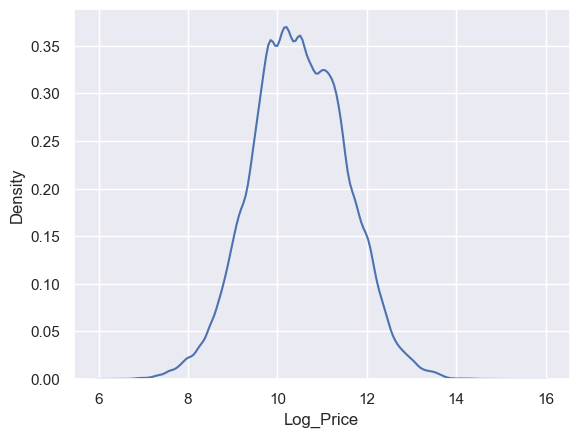

In [76]:
sns.kdeplot(data_13['Log_Price'])

In [77]:
print('Highest value of Year', round(data_13['Log_Price'].mean()+3*data_13['Log_Price'].std(),3))
print('Lowest value of Year', round(data_13['Log_Price'].mean()-3*data_13['Log_Price'].std(),3))

Highest value of Year 13.605
Lowest value of Year 7.37


In [78]:
data_cleaned_1 = data_13[(data_13['Log_Price']>7.37) & (data_13['Log_Price']<13.605)]

<Axes: xlabel='Log_Price', ylabel='Density'>

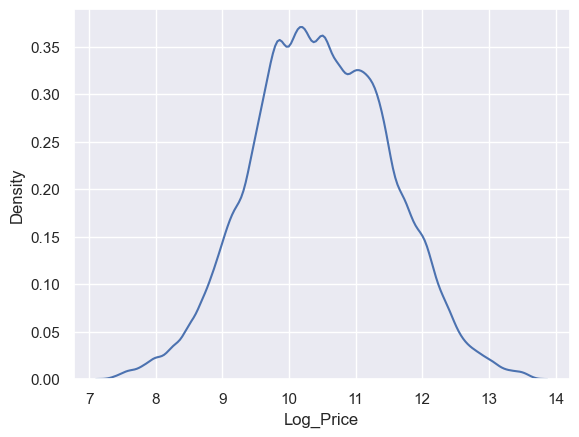

In [79]:
sns.kdeplot(data_cleaned_1['Log_Price'])

### Outliers for Mileage_km

C:\Users\patel\AppData\Local\Temp\ipykernel_20984\2315134447.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned_1['Mileage_km'])


<Axes: xlabel='Mileage_km', ylabel='Density'>

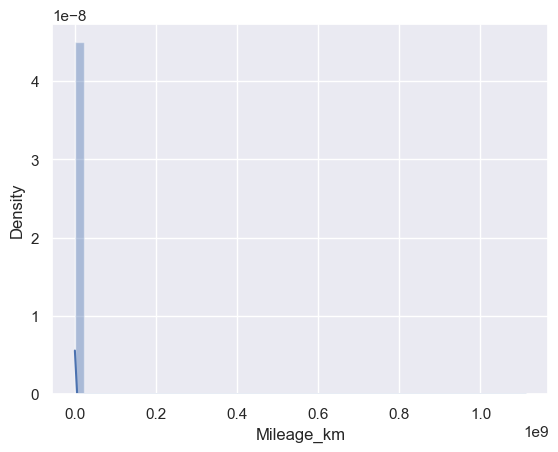

In [80]:
sns.distplot(data_cleaned_1['Mileage_km'])

In [81]:
print('Highest value of the Mileage_km : ',round(data_cleaned_1['Mileage_km'].mean() + 3*data_cleaned_1['Mileage_km'].std(),3))
print('Lowest valeu of the Mileage_km : ',round(data_cleaned_1['Mileage_km'].mean() - data_cleaned_1['Mileage_km'].std(),3))

Highest value of the Mileage_km :  9042995.633
Lowest valeu of the Mileage_km :  -2812362.479


In [82]:
data_cleaned_2 = data_cleaned_1[(data_cleaned_1['Mileage_km'] >= 1) & (data_cleaned_1['Mileage_km'] <= 9042995.633)]

In [83]:
data_cleaned_2 = data_cleaned_2.reset_index(drop = True)

In [84]:
data_cleaned_2

,Vehicle_brand_0,Vehicle_brand_1,Vehicle_brand_2,Vehicle_brand_3,Vehicle_brand_4,Vehicle_brand_5,Vehicle_brand_6,Mileage_km,Power_HP,Displacement_cm3,...,Manual,city_cars,compact,convertible,coupe,minivan,sedan,small_cars,station_wagon,Log_Price
0,0,0,0,0,0,0,1,1.0,145.0,1400.0,...,1,0,0,0,0,0,0,1,0,11.364425
1,0,0,0,0,0,0,1,59000.0,75.0,1100.0,...,1,0,0,0,1,0,0,0,0,10.680516
2,0,0,0,0,0,0,1,52000.0,180.0,1368.0,...,0,0,0,0,0,0,0,1,0,10.712193
3,0,0,0,0,0,0,1,29000.0,160.0,1368.0,...,1,0,0,0,0,0,0,1,0,10.594132
4,0,0,0,0,0,0,1,600.0,165.0,1368.0,...,1,0,0,0,0,0,0,1,0,11.491702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203626,1,0,0,1,0,1,0,40000.0,173.0,1301.0,...,1,0,0,0,0,0,0,1,0,10.594132
203627,1,0,0,1,0,1,0,63518.0,70.0,2120.0,...,1,0,0,0,0,0,0,0,1,9.296518
203628,1,0,0,1,0,1,0,11880.0,60.0,2120.0,...,1,0,0,0,0,0,0,0,0,8.839277
203629,1,0,0,1,0,1,0,100000.0,36.0,2200.0,...,1,0,0,0,0,1,0,0,0,8.648221


### outliers for Power_HP :

<Axes: xlabel='Power_HP', ylabel='Density'>

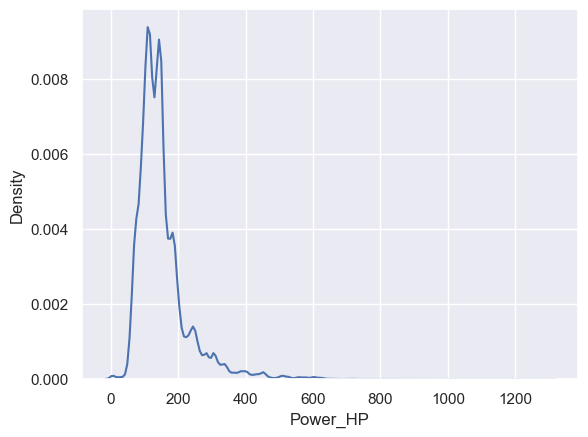

In [85]:
sns.kdeplot(data_cleaned_2['Power_HP'])

In [86]:
print('Highest value of the Power_HP : ',round(data_cleaned_2['Power_HP'].mean() + 3*data_cleaned_2['Power_HP'].std(),3))
print('Lowest value of the Power_HP : ',round(data_cleaned_2['Power_HP'].mean() - 3*data_cleaned_2['Power_HP'].std(),3))

Highest value of the Power_HP :  376.771
Lowest value of the Power_HP :  -75.126


In [87]:
data_cleaned_3 = data_cleaned_2[(data_cleaned_2['Power_HP'] < 376.771) & (data_cleaned_2['Power_HP'] > -75.126)]

In [88]:
data_cleaned_3 = data_cleaned_3.reset_index(drop = True)

In [89]:
data_cleaned_3

,Vehicle_brand_0,Vehicle_brand_1,Vehicle_brand_2,Vehicle_brand_3,Vehicle_brand_4,Vehicle_brand_5,Vehicle_brand_6,Mileage_km,Power_HP,Displacement_cm3,...,Manual,city_cars,compact,convertible,coupe,minivan,sedan,small_cars,station_wagon,Log_Price
0,0,0,0,0,0,0,1,1.0,145.0,1400.0,...,1,0,0,0,0,0,0,1,0,11.364425
1,0,0,0,0,0,0,1,59000.0,75.0,1100.0,...,1,0,0,0,1,0,0,0,0,10.680516
2,0,0,0,0,0,0,1,52000.0,180.0,1368.0,...,0,0,0,0,0,0,0,1,0,10.712193
3,0,0,0,0,0,0,1,29000.0,160.0,1368.0,...,1,0,0,0,0,0,0,1,0,10.594132
4,0,0,0,0,0,0,1,600.0,165.0,1368.0,...,1,0,0,0,0,0,0,1,0,11.491702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199131,1,0,0,1,0,1,0,40000.0,173.0,1301.0,...,1,0,0,0,0,0,0,1,0,10.594132
199132,1,0,0,1,0,1,0,63518.0,70.0,2120.0,...,1,0,0,0,0,0,0,0,1,9.296518
199133,1,0,0,1,0,1,0,11880.0,60.0,2120.0,...,1,0,0,0,0,0,0,0,0,8.839277
199134,1,0,0,1,0,1,0,100000.0,36.0,2200.0,...,1,0,0,0,0,1,0,0,0,8.648221


<Axes: xlabel='Power_HP', ylabel='Density'>

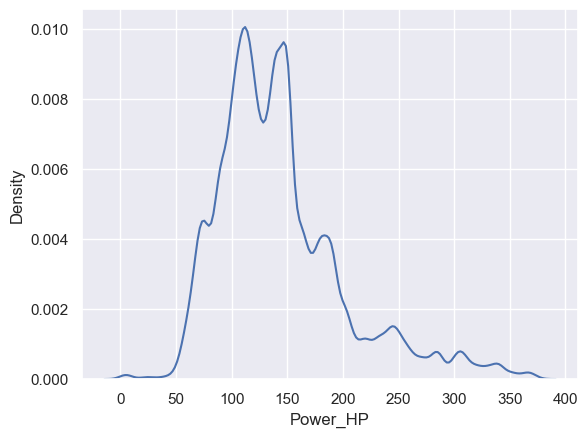

In [90]:
sns.kdeplot(data_cleaned_3['Power_HP'])

### Outliers for Displacement_cm3 :

<Axes: xlabel='Displacement_cm3', ylabel='Density'>

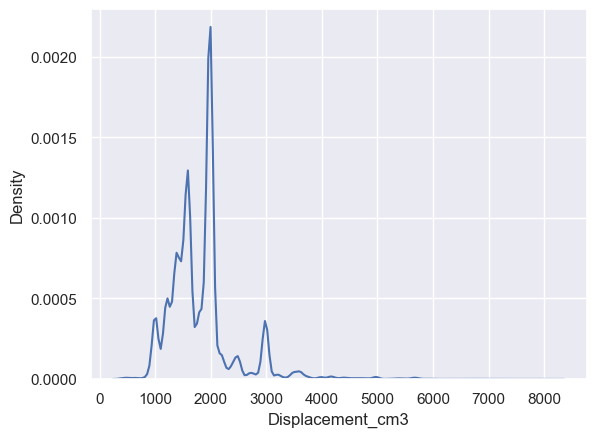

In [91]:
sns.kdeplot(data_cleaned_3['Displacement_cm3'])

In [92]:
print('Highest value of the Displacement_cm3 : ',round(data_cleaned_3['Displacement_cm3'].mean() + 3*data_cleaned_3['Displacement_cm3'].std(),3))
print('Lowest value of the Displacement_cm3 : ',round(data_cleaned_3['Displacement_cm3'].mean() - 3*data_cleaned_3['Displacement_cm3'].std(),3))

Highest value of the Displacement_cm3 :  3634.088
Lowest value of the Displacement_cm3 :  14.451


In [93]:
data_cleaned_4 = data_cleaned_3[(data_cleaned_3['Displacement_cm3'] < 3634.088) & (data_cleaned_3['Displacement_cm3'] > 14.451)]

In [94]:
data_cleaned_4 = data_cleaned_4.reset_index(drop=True)

In [95]:
data_cleaned_4.columns

Index(['Vehicle_brand_0', 'Vehicle_brand_1', 'Vehicle_brand_2',
       'Vehicle_brand_3', 'Vehicle_brand_4', 'Vehicle_brand_5',
       'Vehicle_brand_6', 'Mileage_km', 'Power_HP', 'Displacement_cm3', 'PLN',
       'Used', 'Ethanol', 'Gasoline', 'Gasoline + CNG', 'Gasoline + LPG',
       'Hybrid', 'Hydrogen', 'Manual', 'city_cars', 'compact', 'convertible',
       'coupe', 'minivan', 'sedan', 'small_cars', 'station_wagon',
       'Log_Price'],
      dtype='object')

# Select the inputs and targets : 

In [96]:
targets = data_cleaned_4['Log_Price']
unscaled_inputs = data_cleaned_4.drop(['Log_Price'],axis = 1)

In [97]:
unscaled_inputs.shape

(196323, 27)

# Standardize our data : 

In [98]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator, TransformerMixin): 
    
    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.columns = columns
        self.copy = copy
        self.with_mean = with_mean
        self.with_std = with_std
        self.scaler = None
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler = StandardScaler(copy=self.copy, with_mean=self.with_mean, with_std=self.with_std)
        self.scaler.fit(X[self.columns], y)
        self.mean_ = self.scaler.mean_
        self.var_ = self.scaler.var_
        return self
    
    def transform(self, X, y=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [99]:
unscaled_inputs.columns.values

array(['Vehicle_brand_0', 'Vehicle_brand_1', 'Vehicle_brand_2',
       'Vehicle_brand_3', 'Vehicle_brand_4', 'Vehicle_brand_5',
       'Vehicle_brand_6', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'PLN', 'Used', 'Ethanol', 'Gasoline', 'Gasoline + CNG',
       'Gasoline + LPG', 'Hybrid', 'Hydrogen', 'Manual', 'city_cars',
       'compact', 'convertible', 'coupe', 'minivan', 'sedan',
       'small_cars', 'station_wagon'], dtype=object)

In [100]:
columns_to_omit = ['Vehicle_brand_0',
 'Vehicle_brand_1',
 'Vehicle_brand_2',
 'Vehicle_brand_3',
 'Vehicle_brand_4',
 'Vehicle_brand_5',
 'Vehicle_brand_6','PLN', 'Used', 'Ethanol', 'Gasoline',
       'Gasoline + CNG', 'Gasoline + LPG', 'Hybrid', 'Hydrogen', 'Manual',
       'city_cars', 'compact', 'convertible', 'coupe', 'minivan', 'sedan',
       'small_cars', 'station_wagon']

In [101]:
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [102]:
columns_to_scale

['Mileage_km', 'Power_HP', 'Displacement_cm3']

In [103]:
absenteeism_scaler = CustomScaler(columns_to_scale)
absenteeism_scaler.fit(unscaled_inputs)

scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

# Split the data into train & test and shuffle

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
train_test_split(scaled_inputs,targets)

[        Vehicle_brand_0  Vehicle_brand_1  Vehicle_brand_2  Vehicle_brand_3  \
 156068                1                1                0                0   
 179678                1                0                0                1   
 105146                1                0                0                0   
 47390                 0                0                1                1   
 61000                 0                0                1                1   
 ...                 ...              ...              ...              ...   
 85002                 0                1                1                1   
 172737                1                0                0                1   
 98060                 0                1                1                1   
 48283                 0                0                1                1   
 64544                 0                1                0                0   
 
         Vehicle_brand_4  Vehicle_brand_5  Vehicle

In [106]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs,targets,train_size = 0.8,random_state=20)

In [107]:
print(x_train.shape,y_train.shape)

(157058, 27) (157058,)


In [108]:
print(x_test.shape,y_test.shape)

(39265, 27) (39265,)


# Linear regression with sklearn

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Training Model : 

In [110]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [111]:
y_hat = reg.predict(x_train)

Text(0, 0.5, 'Predictions (y_hat)')

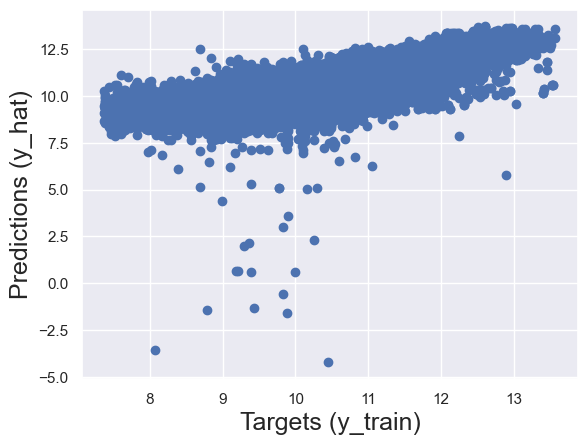

In [112]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same

In [113]:
reg.score(x_train,y_train)

0.7595222137797252

In [114]:
train_errors = abs(y_hat - y_train)
print('Mean Absolute Error:', round(np.mean(train_errors), 2), 'degrees.')

Mean Absolute Error: 0.36 degrees.


In [115]:
train_mape = 100 * (train_errors / y_train)
# Calculate and display accuracy
train_accuracy = 100 - np.mean(train_mape)
print('Accuracy:', round(train_accuracy, 2), '%.')

Accuracy: 96.38 %.


In [116]:
reg.score(x_test,y_test)

0.7635151852873561

In [117]:
y_hat_test = reg.predict(x_test)

In [118]:
test_errors = abs(y_hat_test - y_test)
print('Mean Absolute Error:', round(np.mean(test_errors), 2), 'degrees.')

Mean Absolute Error: 0.36 degrees.


In [119]:
test_mape = 100 * (test_errors / y_test)
# Calculate and display accuracy
test_accuracy = 100 - np.mean(test_mape)
print('Accuracy:', round(test_accuracy, 2), '%.')

Accuracy: 96.41 %.


C:\Users\patel\AppData\Local\Temp\ipykernel_20984\2762528872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_test - y_test)


<Axes: xlabel='Log_Price', ylabel='Density'>

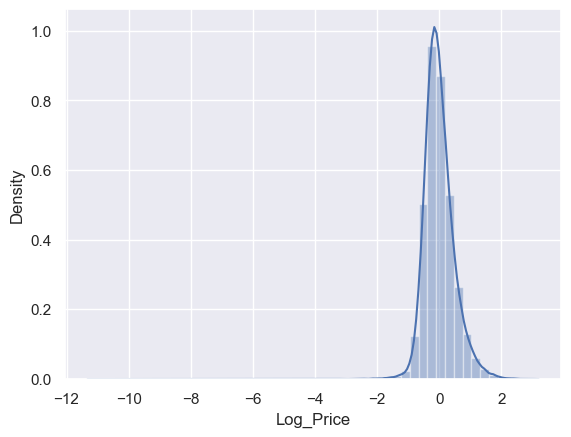

In [120]:
sns.distplot(y_hat_test - y_test)

Text(0, 0.5, 'Predictions (y_hat_test)')

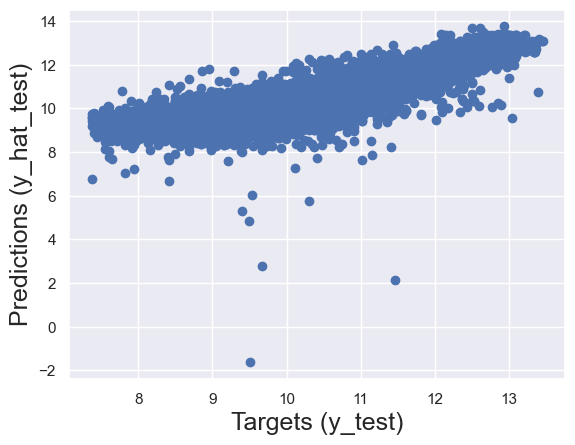

In [121]:
plt.scatter(y_test, y_hat_test)
# Let's also name the axes
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

In [122]:
feature_names = scaled_inputs.columns.values
feature_names

array(['Vehicle_brand_0', 'Vehicle_brand_1', 'Vehicle_brand_2',
       'Vehicle_brand_3', 'Vehicle_brand_4', 'Vehicle_brand_5',
       'Vehicle_brand_6', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'PLN', 'Used', 'Ethanol', 'Gasoline', 'Gasoline + CNG',
       'Gasoline + LPG', 'Hybrid', 'Hydrogen', 'Manual', 'city_cars',
       'compact', 'convertible', 'coupe', 'minivan', 'sedan',
       'small_cars', 'station_wagon'], dtype=object)

In [123]:
summary_table = pd.DataFrame(columns = ['feature_names'],data = feature_names)

summary_table['coefficient'] = np.transpose(reg.coef_)
# we transpose the array because nd.array are rows not the columns
summary_table

,feature_names,coefficient
0,Vehicle_brand_0,-2.409002e-02
1,Vehicle_brand_1,9.712800e-02
2,Vehicle_brand_2,-1.364659e-01
3,Vehicle_brand_3,5.639341e-02
4,Vehicle_brand_4,3.440612e-02
5,Vehicle_brand_5,6.607354e-02
6,Vehicle_brand_6,-3.115423e-02
7,Mileage_km,-5.209565e-01
8,Power_HP,4.728533e-01
9,Displacement_cm3,-1.842597e-01


In [124]:
x_train.shape

(157058, 27)

In [125]:
y_train.shape

(157058,)

## using tf.keras.sequential method

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
type(y_train)

pandas.core.series.Series

In [128]:
scaler = MinMaxScaler(feature_range = (0,1))
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

In [129]:
x_test.shape

(39265, 27)

In [130]:
y_test = scaler.fit_transform(y_test.values.reshape(-1,1))

In [131]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [132]:
model = Sequential([
    Dense(units=32, input_shape=(27,), activation = 'relu'),
    Dense(units=64,activation='relu'),
    Dense(units=1,activation=None)
])

In [133]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='mean_squared_error',metrics=['accuracy'])

In [135]:
early_stopping = tf.keras.callbacks.EarlyStopping()
model.fit(x=x_train, 
          y=y_train, 
          validation_split=0.1, 
          batch_size=10,
          epochs=30, 
          callbacks=[early_stopping],
          shuffle=True,
          verbose=2)


Epoch 1/30
14136/14136 - 42s - loss: 0.0090 - accuracy: 3.5373e-05 - val_loss: 0.0053 - val_accuracy: 0.0000e+00 - 42s/epoch - 3ms/step
Epoch 2/30
14136/14136 - 38s - loss: 0.0052 - accuracy: 3.5373e-05 - val_loss: 0.0050 - val_accuracy: 0.0000e+00 - 38s/epoch - 3ms/step
Epoch 3/30
14136/14136 - 38s - loss: 0.0049 - accuracy: 3.5373e-05 - val_loss: 0.0048 - val_accuracy: 0.0000e+00 - 38s/epoch - 3ms/step
Epoch 4/30
14136/14136 - 38s - loss: 0.0048 - accuracy: 3.5373e-05 - val_loss: 0.0048 - val_accuracy: 0.0000e+00 - 38s/epoch - 3ms/step
Epoch 5/30
14136/14136 - 38s - loss: 0.0047 - accuracy: 3.5373e-05 - val_loss: 0.0049 - val_accuracy: 0.0000e+00 - 38s/epoch - 3ms/step


In [136]:
loss, mae = model.evaluate(x_test, y_test)


1228/1228 [==============================] - 3s 3ms/step - loss: 0.0049 - accuracy: 5.0936e-05


In [137]:
y_pred = model.predict(x_test)

1228/1228 [==============================] - 3s 2ms/step


In [145]:
y_pred = y_pred.reshape(-1)

In [146]:
y_test = y_test.reshape(-1)

In [147]:
errors_2 = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors_2), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


In [155]:
y_test

array([0.49775641, 0.67926272, 0.63573258, ..., 0.65338439, 0.67117696,
       0.49825703])

In [156]:
mape = 100 * np.divide(errors_2, np.where(y_test != 0, y_test, 1))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 79.76 %.


In [138]:
from sklearn.metrics import r2_score, mean_squared_error

In [139]:
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R^2):", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R^2): 0.8181786292937817
Mean Squared Error (MSE): 0.0049015070612475654
